# Subject Specific BCI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
S1_train = pd.read_csv('Bimbola_Train.csv')
S1_test = pd.read_csv('Bimbola_Test.csv')

S2_train = pd.read_csv('Daniel_Train.csv')
S2_test = pd.read_csv('Daniel_Test.csv')

S3_train = pd.read_csv('Simi_Train.csv')
S3_test = pd.read_csv('Simi_Test.csv')

S4_train = pd.read_csv('Samson_Train.csv')

S5_test = pd.read_csv('Precious_Test.csv')


In [4]:
S1_train.head()

,A,B,timestamp,marker,i
0,-1.150465,1.343843,829872.959109,calib-begin,0
1,-0.830395,0.932045,829877.691422,imag_grasp,1
2,-0.324388,0.392276,829882.439560,imag_release,2
3,0.084448,-0.110494,829887.155277,imag_grasp,3
4,0.177769,-0.448987,829891.879471,imag_release,4


In [5]:
S1_train.shape

(122, 5)

In [6]:
S1_train.tail()

,A,B,timestamp,marker,i
117,2.815946,0.041761,830468.032517,imag_grasp,117
118,-2.725176,1.252782,830472.773176,imag_release,118
119,-1.893115,-0.406589,830477.505722,imag_grasp,119
120,1.920568,-1.956314,830482.246928,imag_release,120
121,3.340078,0.529624,830486.968701,calib-end,121


In [7]:
S1_test.shape

(42, 5)

In [8]:
S1_test.tail()

,A,B,timestamp,marker,i
37,1.328991,-0.562766,829671.706366,imag_grasp,37
38,3.174702,-0.204343,829676.437130,imag_release,38
39,4.315216,0.261990,829681.144663,imag_grasp,39
40,4.428629,0.607061,829685.880932,imag_release,40
41,3.489323,0.640655,829690.599112,calib-end,41


In [12]:
# Remove the calib-begin and calib-end
S1_train = S1_train[1:-1]
S1_test = S1_test[1:-1]

S2_train = S2_train[1:-1]
S2_test = S2_test[1:-1]

S3_train = S3_train[1:-1]
S3_test = S3_test[1:-1]

S4_train = S4_train[1:-1]

S5_test = S5_test[1:-1]

# concatenate train data
SI_train = pd.concat([S1_train, S2_train, S3_train, S4_train], ignore_index=True)
SI_test = pd.concat([S1_test, S2_test, S3_test, S5_test], ignore_index=True)

In [31]:
S1_train['marker'].factorize()

(array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1], dtype=int64),
 Index(['imag_release', 'imag_grasp'], dtype='object'))

In [ ]:
# 'imag_release' - 0,  'imag_grasp' - 1

# Subject Selected Classifiers

In [51]:
# S1
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as lg
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import GradientBoostingClassifier as gbc

lsvc = LinearSVC()
svc = SVC(probability=True)
lgr = lg()
rfclf = rfc()
ada = abc()
grad = gbc()

S1_learn = S1_train[['A', 'B']]
y1_learn = S1_train['marker'].factorize()[0]
S1_valid = S1_test[['A', 'B']]
y1_valid = S1_test['marker'].factorize()[0]

lsvc.fit(S1_learn, y1_learn)
svc.fit(S1_learn, y1_learn)
lgr.fit(S1_learn, y1_learn)
rfclf.fit(S1_learn, y1_learn)
ada.fit(S1_learn, y1_learn)
grad.fit(S1_learn, y1_learn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GradientBoostingClassifier()

In [52]:
print('________________________________________________\n')
print('LinearSVC')
print(f'Subject_1 accuracy train score {lsvc.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {lsvc.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('SVC')
print(f'Subject_1 accuracy train score {svc.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {svc.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('LogisticRegression')
print(f'Subject_1 accuracy train score {lgr.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {lgr.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('RandomForest')
print(f'Subject_1 accuracy train score {rfclf.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {rfclf.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('AdaBoost')
print(f'Subject_1 accuracy train score {ada.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {ada.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('GradientBoost')
print(f'Subject_1 accuracy train score {grad.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {grad.score(S1_valid, y1_valid)}')


________________________________________________

LinearSVC
Subject_1 accuracy train score 0.5338983050847458
Subject_1 accuracy test score 0.5526315789473685
________________________________________________

SVC
Subject_1 accuracy train score 0.5847457627118644
Subject_1 accuracy test score 0.5
________________________________________________

LogisticRegression
Subject_1 accuracy train score 0.5338983050847458
Subject_1 accuracy test score 0.5526315789473685
________________________________________________

RandomForest
Subject_1 accuracy train score 1.0
Subject_1 accuracy test score 0.5789473684210527
________________________________________________

AdaBoost
Subject_1 accuracy train score 0.8559322033898306
Subject_1 accuracy test score 0.5789473684210527
________________________________________________

GradientBoost
Subject_1 accuracy train score 1.0
Subject_1 accuracy test score 0.5263157894736842


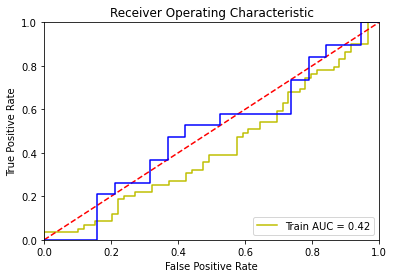

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lpr_train = svc.predict_proba(S1_learn)[:,1]
lpr_valid = svc.predict_proba(S1_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y1_learn, lpr_train)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fpr, tpr, thresholds = roc_curve(y1_valid, lpr_valid)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)


In [47]:
# S1
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as lg
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import GradientBoostingClassifier as gbc

lsvc = LinearSVC()
svc = SVC()
lgr = lg()
rfclf = rfc()
ada = abc()
grad = gbc()

S1_learn = S1_train[['A', 'B']]
y1_learn = S1_train['marker'].factorize()[0]
S1_valid = S1_test[['A', 'B']]
y1_valid = S1_test['marker'].factorize()[0]

lsvc.fit(S1_learn, y1_learn)
svc.fit(S1_learn, y1_learn)
lgr.fit(S1_learn, y1_learn)
rfclf.fit(S1_learn, y1_learn)
ada.fit(S1_learn, y1_learn)
grad.fit(S1_learn, y1_learn)

GradientBoostingClassifier()

In [48]:
print('________________________________________________\n')
print('LinearSVC')
print(f'Subject_1 accuracy train score {lsvc.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {lsvc.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('SVC')
print(f'Subject_1 accuracy train score {svc.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {svc.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('LogisticRegression')
print(f'Subject_1 accuracy train score {lgr.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {lgr.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('RandomForest')
print(f'Subject_1 accuracy train score {rfclf.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {rfclf.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('AdaBoost')
print(f'Subject_1 accuracy train score {ada.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {ada.score(S1_valid, y1_valid)}')

print('________________________________________________\n')
print('GradientBoost')
print(f'Subject_1 accuracy train score {grad.score(S1_learn, y1_learn)}')
print(f'Subject_1 accuracy test score {grad.score(S1_valid, y1_valid)}')


________________________________________________

LinearSVC
Subject_1 accuracy train score 0.5338983050847458
Subject_1 accuracy test score 0.5526315789473685
________________________________________________

SVC
Subject_1 accuracy train score 0.5847457627118644
Subject_1 accuracy test score 0.5
________________________________________________

LogisticRegression
Subject_1 accuracy train score 0.5338983050847458
Subject_1 accuracy test score 0.5526315789473685
________________________________________________

RandomForest
Subject_1 accuracy train score 1.0
Subject_1 accuracy test score 0.5
________________________________________________

AdaBoost
Subject_1 accuracy train score 0.8559322033898306
Subject_1 accuracy test score 0.5789473684210527
________________________________________________

GradientBoost
Subject_1 accuracy train score 1.0
Subject_1 accuracy test score 0.5263157894736842
